In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 11 12:31:45 2016

@author: daniel
"""

from numpy import *
import re
import matplotlib.pyplot as plt
import scipy.stats as stat
from scipy import nanmean

def step(x,a):
    return 1*(x>a)
    
def V(x,t,photons):
    V = 0
    for i in photons:
        if i!="#":
            V = V + qe*step(x,i)*exp(-x/t)
    return(V)

## Parámetros ##
# tiempo dado por inductancia total
t = 18.76
# eficiencia cuántica para 405 nm en milivatios
qe = 80

infile = open('1000muones.txt', 'r')

pulsos = [[]]
npulso = 0

for line in infile:
    if line.split(' ')[0] == "#\n":
        pulsos.append([])
        npulso = npulso + 1
    elif line.split(' ')[1] == "ps":
        pulsos[npulso].append(float(line.split(' ')[0])/1000)
    else:
        pulsos[npulso].append(float(line.split(' ')[0]))
    
#per_column = zip(per_row)

x = linspace(0,100,500)

y = []
for i in range(0,len(pulsos)-1): # -1 corrige por el último # del archivo
    y.append(V(x,t,pulsos[i]))

amp       = []
ancho     = []
rise_time = []

for k in y:
    a    = amax(k)
    mean = nanmean(k)
    std  = stat.tstd(k)
    amp.append(a)

    #ancho.append(x[k.index()])
#    for i in range(0,len(k)):
#        if i > 0*a:
#            index1 = i
    rise_time.append(x[list(k).index(a)])
    
#plt.plot(x,yins_means)
#plt.plot(x,yins_max,'--',color="grey")
#plt.plot(x,yins_min,'--',color="grey")
#plt.show()
    
plt.plot(rise_time,amp,'*',label="Muon 4GeV")
plt.legend()
plt.xlabel("Rise time (ns)")
plt.ylabel("Amplitud (mA/W)")
plt.show()

<Figure size 640x480 with 1 Axes>

C:\Users\Home\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1657: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


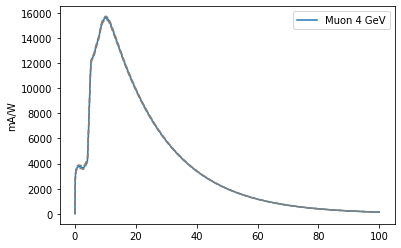

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 11 12:31:45 2016

@author: daniel
"""

from numpy import *
import re
import matplotlib.pyplot as plt
import scipy.stats as stat

def step(x,a):
    return 1*(x>a)

    
def V(x,t,photons):
    V = 0
    for i in photons:
        if i!="#":
            V = V + qe*step(x,i)*exp(-x/t)
    return(V)

## Parámetros ##
# tiempo dado por inductancia total
t = 18.76
# eficiencia cuántica para 405 nm en miliamperios/vatios
qe = 80

infile = open('1000muones.txt', 'r')

pulsos = [[]]
npulso = 0

for line in infile:
    if line.split(' ')[0] == "#\n":
        pulsos.append([])
        npulso = npulso + 1
    elif line.split(' ')[1] == "ps":
        pulsos[npulso].append(float(line.split(' ')[0])/1000)
    else:
        pulsos[npulso].append(float(line.split(' ')[0]))
    
#per_column = zip(per_row)

x = linspace(0,100,1000)

y = []
for i in range(0,len(pulsos)-1):
    y.append(V(x,t,pulsos[i]))

yins = map(list,zip(*y)) 
shapiros = []

yins_means = []
yins_std   = []
yins_max   = []
yins_min   = []

for i in yins:
    yins_means.append(mean(i))
    shapiros.append(stat.shapiro(i)[1])
    yins_std.append(std(i)/(npulso)**(0.5))
    yins_max.append(mean(i)+std(i)/(npulso)**(0.5))
    yins_min.append(mean(i)-std(i)/(npulso)**(0.5))
    
#fig1 = plt.subplot(311)
plt.plot(x,yins_means,label='Muon 4 GeV')
plt.ylabel("mA/W")
plt.plot(x,yins_max,'--',color="grey")
plt.plot(x,yins_min,'--',color="grey")
plt.legend()
#fig1.plot(x,yins)
#fig1.legend()
#fig1.set_title("Muones 4GeV")
#fig1.set_ylabel("Amplitud (mA/W)")
plt.show()